In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler

<h1> ----LOADING THE DATA---- </h1>

In [2]:
fam = pd.read_csv("dataset//Family_Income_and_Expenditure.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset//Family_Income_and_Expenditure.csv'

In [ ]:
fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

<h1> ---- UNDERSTANDING THE DATA STRUCTURE---- </h1>

In [ ]:
fam.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

<h1> ---- CHECK AND HANDLE MISSING VALUES---- </h1> 

In [ ]:
missing = fam.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
fam[['Household Head Occupation', 'Household Head Class of Worker', 'Toilet Facilities']].isnull().sum()

Household Head Occupation         0
Household Head Class of Worker    0
Toilet Facilities                 0
dtype: int64

In [ ]:
cols_to_fill = [
    'Household Head Occupation',
    'Household Head Class of Worker',
    'Toilet Facilities',
    
]

for col in cols_to_fill:
    if fam[col].dtype.name != 'category':
        fam[col] = fam[col].astype('category')
    if 'Unknown' not in fam[col].cat.categories:
        fam[col] = fam[col].cat.add_categories('Unknown')
    fam[col] = fam[col].fillna('Unknown')


In [ ]:
fam.duplicated().sum()
fam= fam.drop_duplicates()


<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight #1
Which region in the Philippines has the highest average household income?</h1>

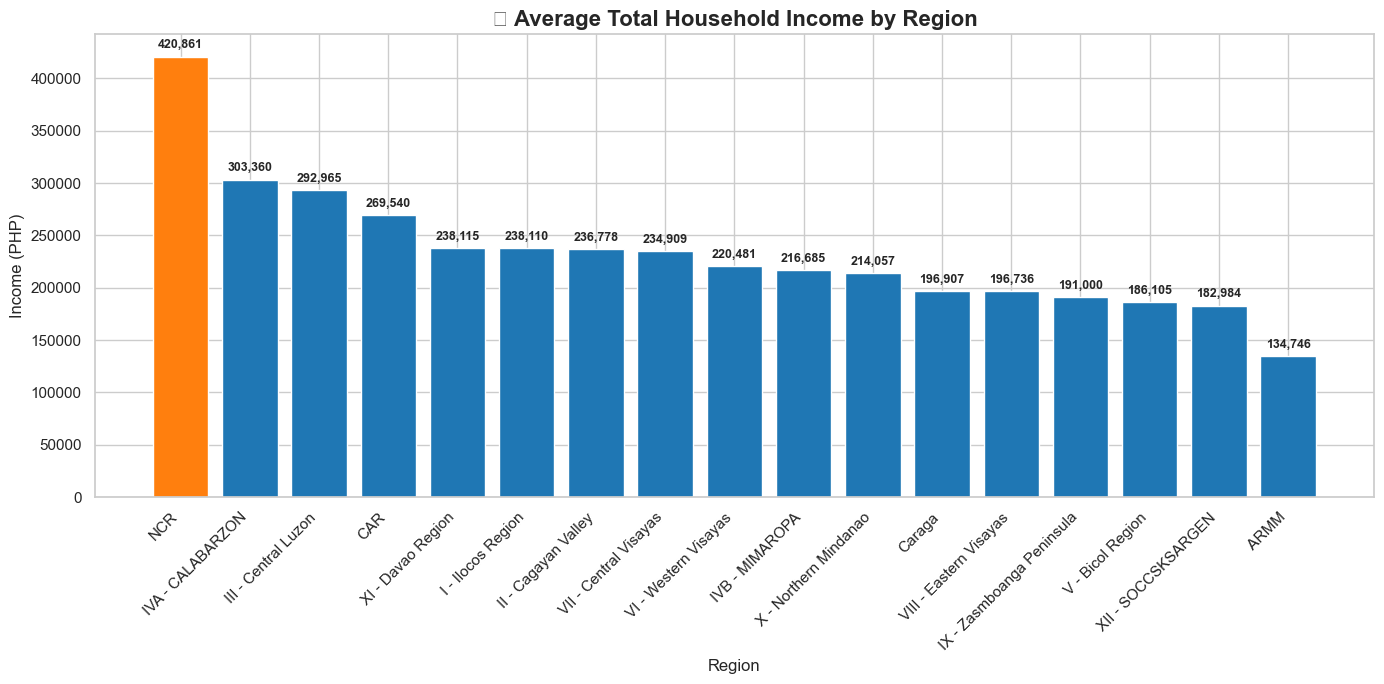

In [ ]:
income_by_region = fam.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,7))
sns.set_theme(style="whitegrid")
colors = ['#1f77b4' if region != 'NCR' else '#ff7f0e' for region in income_by_region.index]
bars = plt.bar(income_by_region.index, income_by_region.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5000, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title('📈 Average Total Household Income by Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Income (PHP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>The National Capital Region (NCR) has the highest average total household income among all regions, with income levels significantly above the national average. This highlights NCR’s status as the country’s economic center, where high-paying jobs and industries are concentrated.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight #2
Which region spends the most on food on average?</h1>

In [ ]:
fam.columns = fam.columns.str.strip()
avg_food_by_region = fam.groupby('Region')['Total Food Expenditure'].mean().sort_values(ascending=False)

avg_food_by_region.head(2)

Region
NCR                 127080.456659
IVA - CALABARZON    105333.949543
Name: Total Food Expenditure, dtype: float64

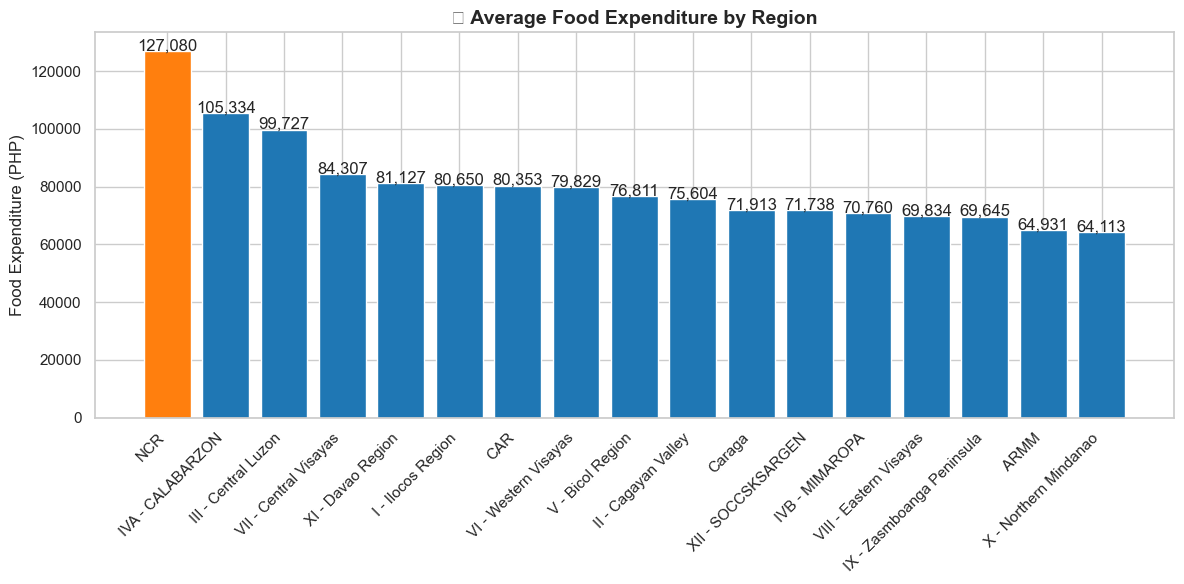

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
colors = ['#ff7f0e' if r=='NCR' else '#1f77b4' for r in avg_food_by_region.index]

bars = plt.bar(avg_food_by_region.index, avg_food_by_region.values, color=colors)
plt.title('🍲 Average Food Expenditure by Region', fontsize=14, weight='bold')
plt.ylabel('Food Expenditure (PHP)')
plt.xticks(rotation=45, ha='right')
for b in bars:
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h+200, f'{h:,.0f}', ha='center')
plt.tight_layout()
plt.show()

 <h1>Insight: We’ll compute the mean of Total Food Expenditure by region to see where households spend the most on food.</h1>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 3: Stark Income Gap Between NCR and ARMM
</h1>

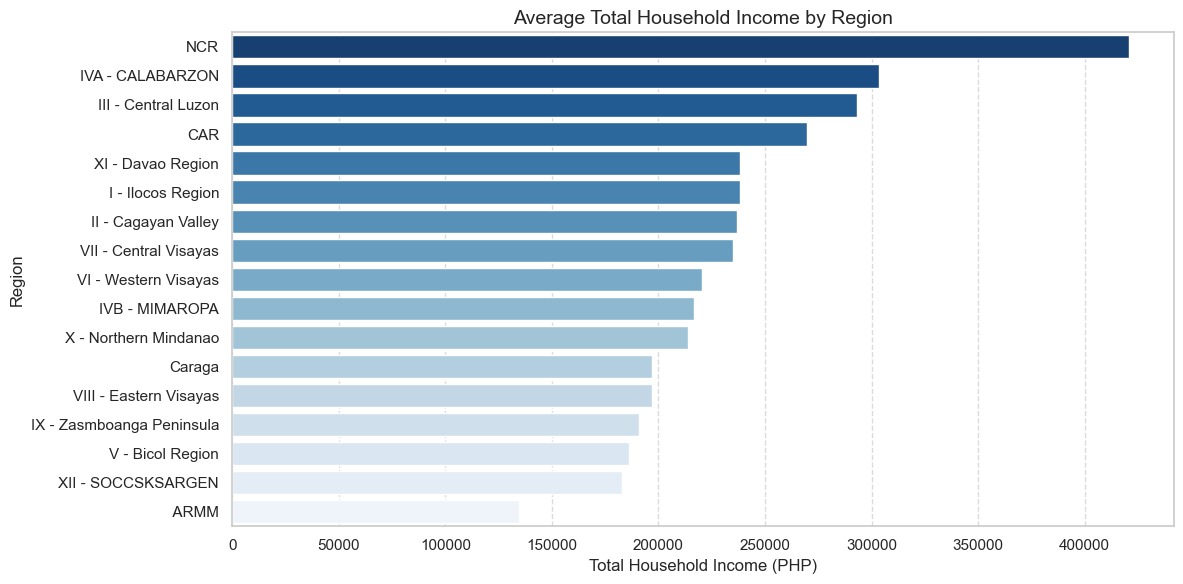

In [ ]:
income_by_region_reset = income_by_region.reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=income_by_region_reset, x='Total Household Income', y='Region', palette='Blues_r')


plt.title('Average Total Household Income by Region', fontsize=14)
plt.xlabel('Total Household Income (PHP)')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>“The National Capital Region (NCR) reports the highest average total household income at ₱420,862, while the Autonomous Region in Muslim Mindanao (ARMM) records the lowest at only ₱134,747. This massive gap of nearly ₱286,115 highlights significant income inequality in the Philippines. It emphasizes the concentration of economic resources in NCR and the pressing need for targeted development initiatives in regions like ARMM.”</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1> Insight 4: Clustering of High-Income Regions Across the Philippines</h1>

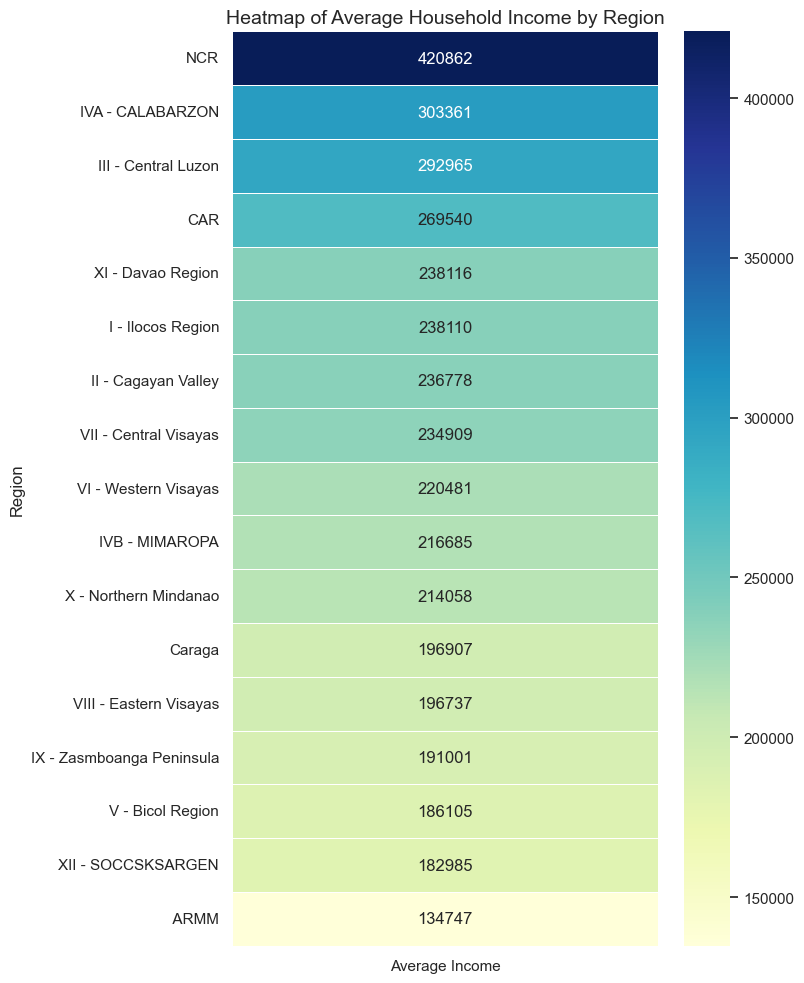

In [ ]:
heatmap_df = fam.groupby("Region")[["Total Household Income"]].mean().sort_values("Total Household Income", ascending=False)
heatmap_data = pd.DataFrame(index=heatmap_df.index, columns=["Average Income"])
heatmap_data["Average Income"] = heatmap_df["Total Household Income"]

plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Average Household Income by Region", fontsize=14)
plt.ylabel("Region")
plt.xlabel("")
plt.tight_layout()
plt.show()

<h3>High-income households are concentrated in regions such as NCR (Metro Manila), CALABARZON, and Central Luzon, highlighting economic centralization in urban and industrial hubs.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight #5: Which regions have the highest concentration of agricultural households, and where are they located?</h1>

In [ ]:
agri_proportion = fam.groupby('Region')['Agricultural Household indicator'].mean().sort_values(ascending=False)
print("Proportion of Agricultural Households by Region:")
print(agri_proportion)

region_coords = {
    'CAR': [16.6167, 120.6000],
    'XII - SOCCSKSARGEN': [6.1167, 125.1667],
    'NCR': [14.5995, 120.9842],
    'Region I': [16.0833, 120.3333],
    'Region II': [17.6131, 121.7270],
    'Region III': [15.4833, 120.9667],
    'Region IV-A': [14.1000, 121.0833],
    'Region IV-B': [10.6667, 119.5000],
    'Region V': [13.5833, 123.3333],
    'Region VI': [10.7200, 122.5600],
    'Region VII': [10.3157, 123.8854],
    'Region VIII': [11.2500, 125.0000],
    'Region IX': [7.8167, 123.4333],
    'Region X': [8.4833, 124.6500],
    'Region XI': [7.0800, 125.6100],
    'Region XIII': [9.5500, 125.5333],
    'ARMM': [6.9167, 124.2833]
}


agri_data = agri_proportion.reset_index()
agri_data['Latitude'] = agri_data['Region'].map(lambda x: region_coords.get(x, [None, None])[0])
agri_data['Longitude'] = agri_data['Region'].map(lambda x: region_coords.get(x, [None, None])[1])
agri_data = agri_data.dropna(subset=['Latitude', 'Longitude'])

scaler = MinMaxScaler()
agri_data['normalized'] = scaler.fit_transform(agri_data[['Agricultural Household indicator']])

heat_data = agri_data[['Latitude', 'Longitude', 'normalized']].values.tolist()
map_ph = folium.Map(location=[12.8797, 121.7740], zoom_start=6)
HeatMap(heat_data).add_to(map_ph)
map_ph.save('agricultural_households_heatmap.html')
map_ph

Proportion of Agricultural Households by Region:
Region
NCR                          1.727361
 ARMM                        0.637011
XII - SOCCSKSARGEN           0.553723
IX - Zasmboanga Peninsula    0.536353
XI - Davao Region            0.445626
II - Cagayan Valley          0.417756
CAR                          0.347246
IVB - MIMAROPA               0.321057
VIII - Eastern Visayas       0.291827
VI - Western Visayas         0.263066
X - Northern Mindanao        0.235294
Caraga                       0.234568
V - Bicol Region             0.195793
VII - Central Visayas        0.135380
I - Ilocos Region            0.132027
III - Central Luzon          0.129441
IVA - CALABARZON             0.069678
Name: Agricultural Household indicator, dtype: float64


<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 6: Spending Priorities Across Regions – Focus on Food Expenditure</h1>

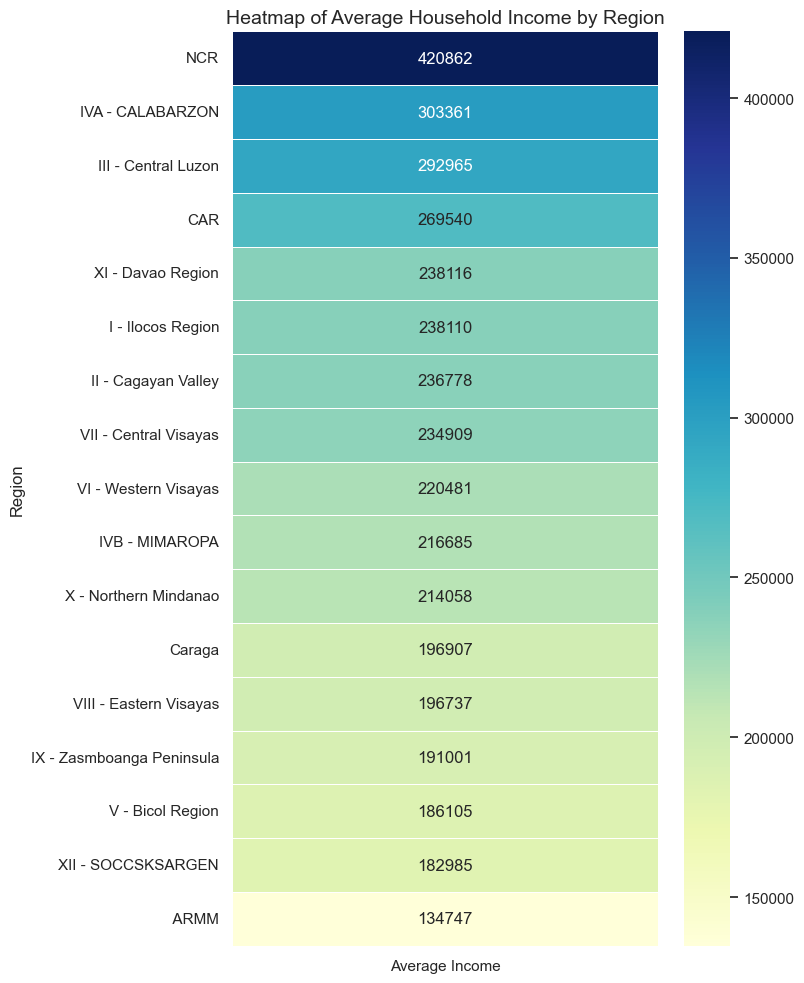

In [ ]:
heatmap_df = fam.groupby("Region")[["Total Household Income"]].mean().sort_values("Total Household Income", ascending=False)
heatmap_data = pd.DataFrame(index=heatmap_df.index, columns=["Average Income"])
heatmap_data["Average Income"] = heatmap_df["Total Household Income"]

plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Average Household Income by Region", fontsize=14)
plt.ylabel("Region")
plt.xlabel("")
plt.tight_layout()
plt.show()

<h3>High-income households are concentrated in regions such as NCR (Metro Manila), CALABARZON, and Central Luzon, highlighting economic centralization in urban and industrial hubs.</h3>

<h1>----------------------------------------------------------------------------------</h1>


<h1>Insight 7: Expenditure Patterns Across Main Sources of Income</h1>

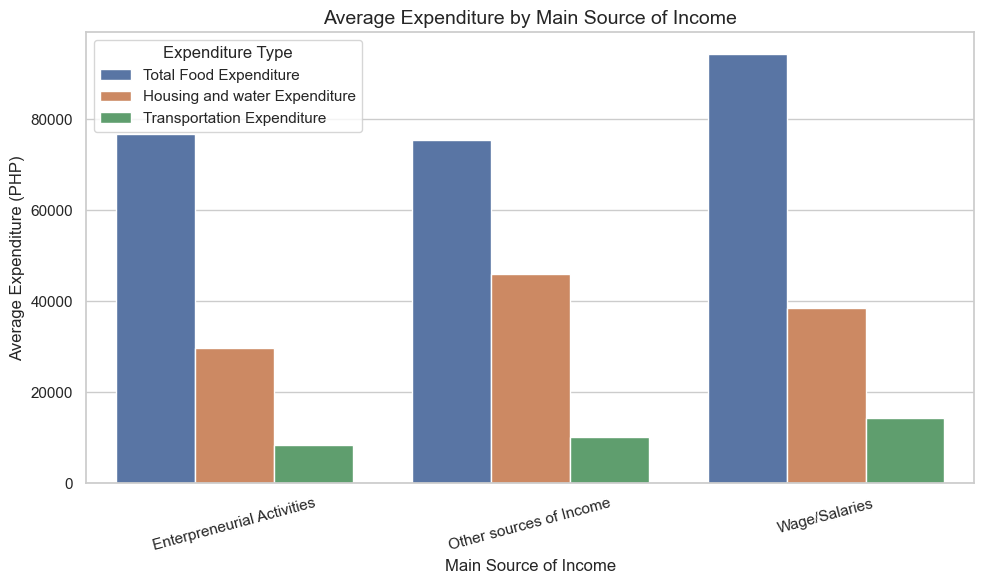

In [ ]:
expenditure_df = fam.groupby("Main Source of Income")[["Total Food Expenditure", "Housing and water Expenditure", "Transportation Expenditure"]].mean().reset_index()


expenditure_melted = pd.melt(expenditure_df, id_vars="Main Source of Income", 
                             value_vars=["Total Food Expenditure", "Housing and water Expenditure", "Transportation Expenditure"],
                             var_name="Expenditure Type", value_name="Average Expenditure")

plt.figure(figsize=(10, 6))
sns.barplot(x="Main Source of Income", y="Average Expenditure", hue="Expenditure Type", data=expenditure_melted)
plt.title("Average Expenditure by Main Source of Income", fontsize=14)
plt.xlabel("Main Source of Income")
plt.ylabel("Average Expenditure (PHP)")
plt.legend(title="Expenditure Type")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<h3>Insight: Households with "Entrepreneurial Activities" as their main income source tend to have higher transportation expenditures, possibly due to business-related travel or logistics. In contrast, households relying on "Wage/Salaries" allocate a larger portion to housing and water, reflecting stable income supporting fixed costs. "Other Sources of Income" households show lower overall spending, indicating potential reliance on remittances or pensions with conservative expenditure patterns.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>INSIGHT:8Impact of Household Head Education on Income and Food Expenditure</h1>

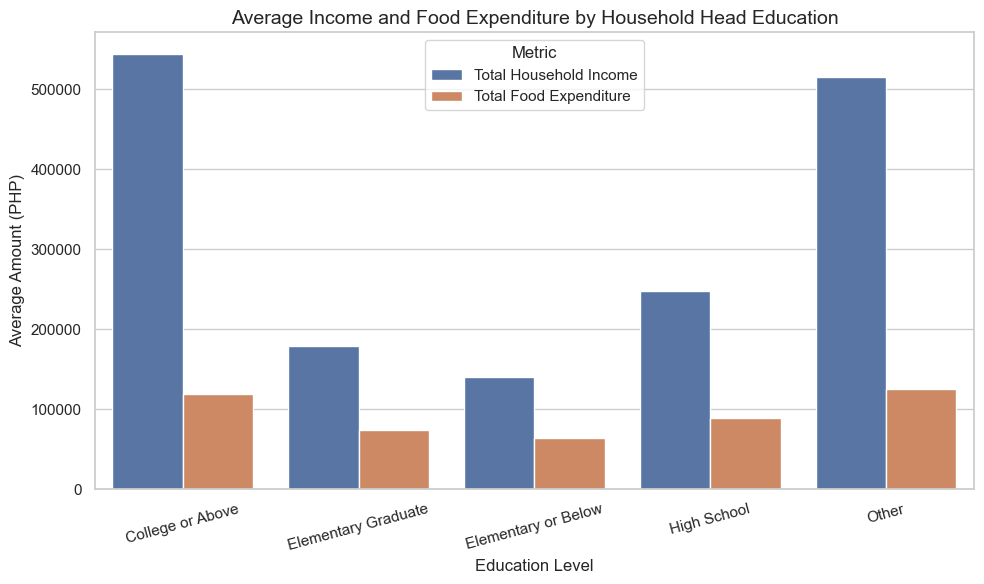

In [ ]:
def simplify_education(grade):
    if grade in ['No Grade Completed', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6']:
        return 'Elementary or Below'
    elif 'Elementary' in grade:
        return 'Elementary Graduate'
    elif 'High School' in grade or 'Year' in grade:
        return 'High School'
    elif 'College' in grade or 'Baccalaureate' in grade or 'Teacher Training' in grade:
        return 'College or Above'
    else:
        return 'Other'

fam['Education Category'] = fam['Household Head Highest Grade Completed'].apply(simplify_education)

edu_df = fam.groupby('Education Category')[['Total Household Income', 'Total Food Expenditure']].mean().reset_index()

edu_melted = pd.melt(edu_df, id_vars='Education Category', 
                     value_vars=['Total Household Income', 'Total Food Expenditure'],
                     var_name='Metric', value_name='Average Amount')

plt.figure(figsize=(10, 6))
sns.barplot(x='Education Category', y='Average Amount', hue='Metric', data=edu_melted)
plt.title('Average Income and Food Expenditure by Household Head Education', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Average Amount (PHP)')
plt.legend(title='Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<h3>Insight: Households with heads who have attained "College or Above" education report significantly higher average incomes and food expenditures compared to those with "Elementary or Below" education. This suggests that higher education correlates with better-paying jobs, enabling greater spending on essentials like food. However, even high-income households maintain substantial food budgets, indicating food as a universal priority across education levels.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 9: Regional Composition of Main Income Sources</h1>

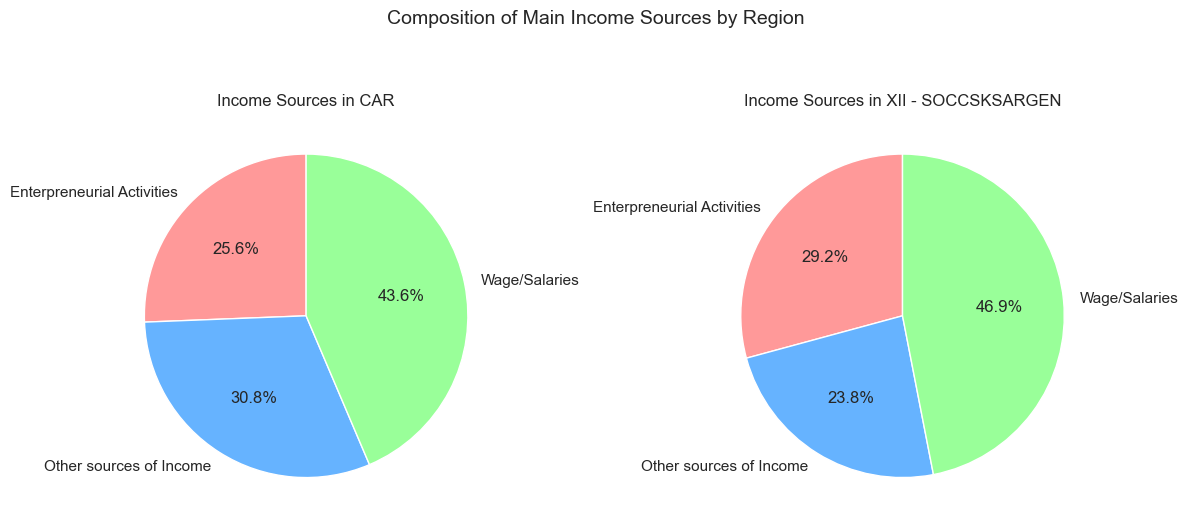

In [ ]:
regions = ['CAR', 'XII - SOCCSKSARGEN']
fam_regions = fam[fam['Region'].isin(regions)]

income_counts = fam_regions.groupby(['Region', 'Main Source of Income']).size().unstack(fill_value=0)
income_props = income_counts.div(income_counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, region in enumerate(regions):
    props = income_props.loc[region]
    axes[i].pie(props, labels=props.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
    axes[i].set_title(f'Income Sources in {region}', fontsize=12)
plt.suptitle('Composition of Main Income Sources by Region', fontsize=14)
plt.tight_layout()
plt.show()

<h3>Insight: In CAR, wages and salaries dominate (over 50%), reflecting urban employment opportunities in government and private sectors. In contrast, SOCCSKSARGEN has a higher proportion of entrepreneurial activities (around 40%), driven by agriculture and small businesses, with fewer households relying on other sources. This contrast underscores CAR’s urban economic base versus SOCCSKSARGEN’s agricultural and entrepreneurial focus, informing regional policy priorities.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 10: Influence of Agricultural Households on Expenditure Patterns</h1>

<Figure size 1000x600 with 0 Axes>

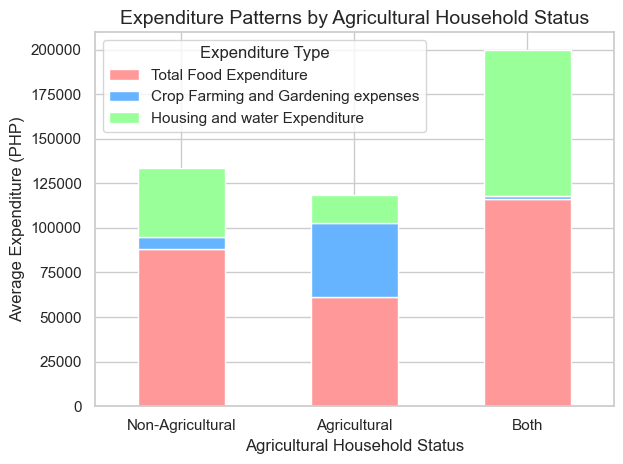

In [ ]:
agri_df = fam.groupby('Agricultural Household indicator')[['Total Food Expenditure', 
                                                         'Crop Farming and Gardening expenses', 
                                                         'Housing and water Expenditure']].mean().reset_index()


agri_df['Agricultural Household indicator'] = agri_df['Agricultural Household indicator'].map({0: 'Non-Agricultural', 1: 'Agricultural', 2: 'Both'})

plt.figure(figsize=(10, 6))
agri_df.set_index('Agricultural Household indicator').plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Expenditure Patterns by Agricultural Household Status', fontsize=14)
plt.xlabel('Agricultural Household Status')
plt.ylabel('Average Expenditure (PHP)')
plt.legend(title='Expenditure Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h3>Insight: Agricultural households (indicator = 1) allocate a significant portion of their budget to crop farming and gardening expenses, often exceeding housing costs, reflecting their reliance on farming activities. Non-agricultural households (indicator = 0) prioritize housing and food, with negligible farming expenses. Households with both characteristics (indicator = 2) show balanced spending but higher food budgets, likely due to access to home-grown produce supplemented by purchases, especially in regions like SOCCSKSARGEN.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 11: Who Spends More on Education?</h1>

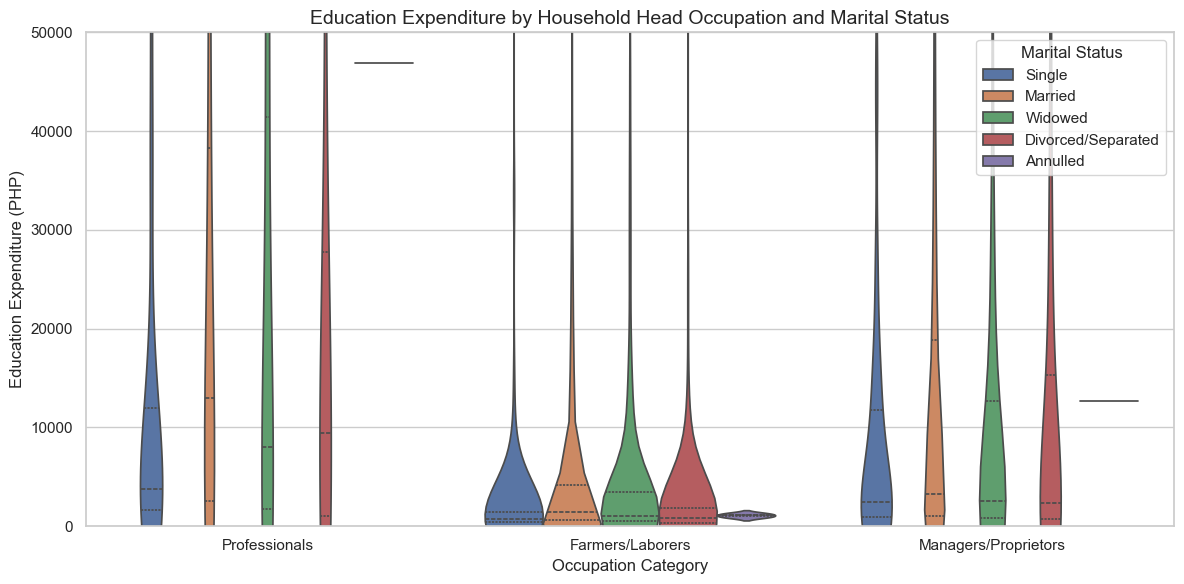

In [ ]:
def simplify_occupation(occupation):
    if pd.isna(occupation):
        return 'No Job'
    if 'teaching' in occupation.lower() or 'professionals' in occupation.lower():
        return 'Professionals'
    if 'farmer' in occupation.lower() or 'farmhands' in occupation.lower():
        return 'Farmers/Laborers'
    if 'managers' in occupation.lower() or 'proprietors' in occupation.lower():
        return 'Managers/Proprietors'
    return 'Other'

fam['Occupation Category'] = fam['Household Head Occupation'].apply(simplify_occupation)
edu_df = fam[fam['Education Expenditure'] > 0]

top_occupations = ['Professionals', 'Farmers/Laborers', 'Managers/Proprietors']
edu_df = edu_df[edu_df['Occupation Category'].isin(top_occupations)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='Occupation Category', y='Education Expenditure', hue='Household Head Marital Status', 
               split=False, data=edu_df, inner='quartile')
plt.title('Education Expenditure by Household Head Occupation and Marital Status', fontsize=14)
plt.xlabel('Occupation Category')
plt.ylabel('Education Expenditure (PHP)')
plt.ylim(0, 50000)  
plt.legend(title='Marital Status', loc='upper right')
plt.tight_layout()
plt.show()

<h3>Insight: Married household heads in professional occupations (e.g., teachers, social science professionals) spend significantly more on education, with a median expenditure around 20,000 PHP, likely prioritizing children’s schooling due to stable incomes and family responsibilities. Single heads in similar roles show lower and more variable spending, possibly due to fewer dependents. Farmers/laborers, regardless of marital status, have minimal education budgets, reflecting income constraints in regions like SOCCSKSARGEN, where agricultural work dominates.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 12: Where Are Housing Expenditures Highest? (Regional Analysis)</h1>

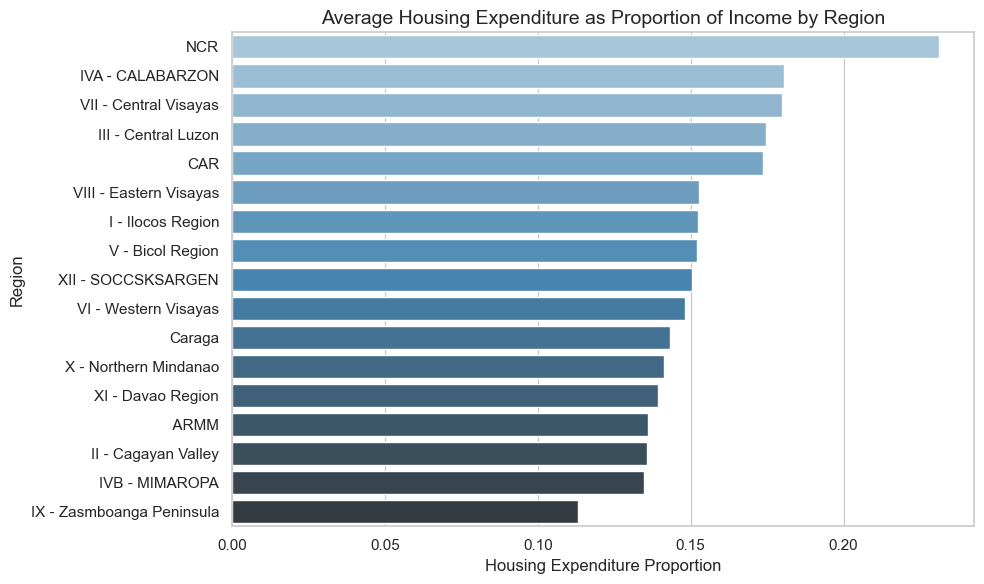

In [ ]:
fam['Housing Proportion'] = fam['Housing and water Expenditure'] / fam['Total Household Income']
housing_df = fam.groupby('Region')['Housing Proportion'].mean().reset_index().sort_values('Housing Proportion', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Housing Proportion', y='Region', data=housing_df, palette='Blues_d')
plt.title('Average Housing Expenditure as Proportion of Income by Region', fontsize=14)
plt.xlabel('Housing Expenditure Proportion')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h3>Insight: Households in CAR allocate a higher proportion of their income (around 25–30%) to housing and water compared to SOCCSKSARGEN (closer to 20%), despite similar income levels. This suggests higher housing costs in CAR, possibly due to urban development and limited land availability. SOCCSKSARGEN’s lower proportion reflects more affordable housing, likely tied to rural settings and agricultural land use, highlighting regional cost-of-living disparities.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 13: What Is the Composition of Non-Food Expenditures Across Income Levels?</h1>

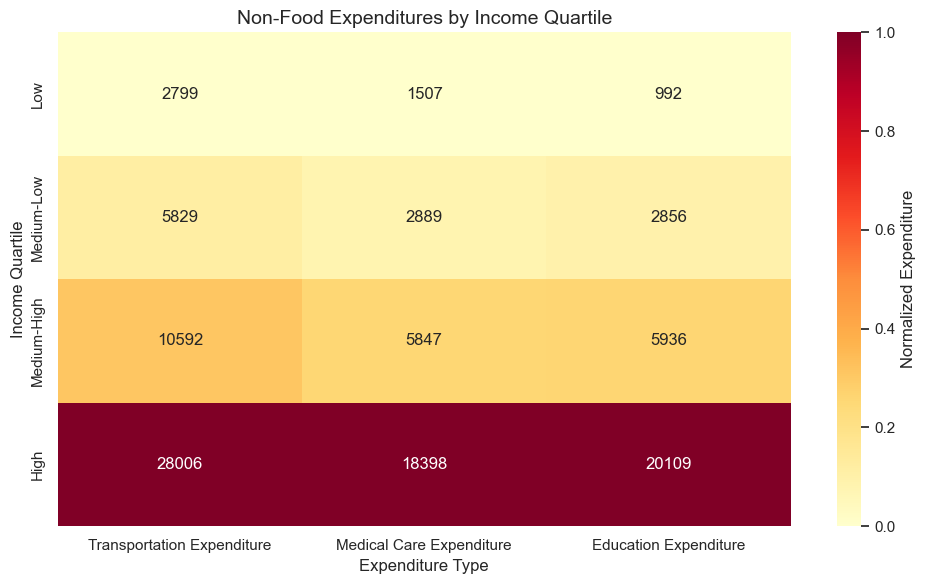

In [ ]:
fam['Income Quartile'] = pd.qcut(fam['Total Household Income'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
non_food_df = fam.groupby('Income Quartile')[['Transportation Expenditure', 'Medical Care Expenditure', 'Education Expenditure']].mean()
non_food_normalized = (non_food_df - non_food_df.min()) / (non_food_df.max() - non_food_df.min())

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(non_food_normalized, annot=non_food_df.round(0), fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Normalized Expenditure'})
plt.title('Non-Food Expenditures by Income Quartile', fontsize=14)
plt.xlabel('Expenditure Type')
plt.ylabel('Income Quartile')
plt.tight_layout()
plt.show()

<h3>Insight: High-income households allocate significantly more to education and transportation, with normalized values near 1, reflecting investments in mobility and human capital. Low-income households prioritize medical care over education, possibly due to immediate health needs, especially in rural SOCCSKSARGEN, where access to healthcare is limited. Medium-income households show balanced spending, indicating a transitional phase in financial priorities, useful for targeted subsidy programs.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 14: Why Do Some Households Save More?</h1>

<Figure size 1000x600 with 0 Axes>

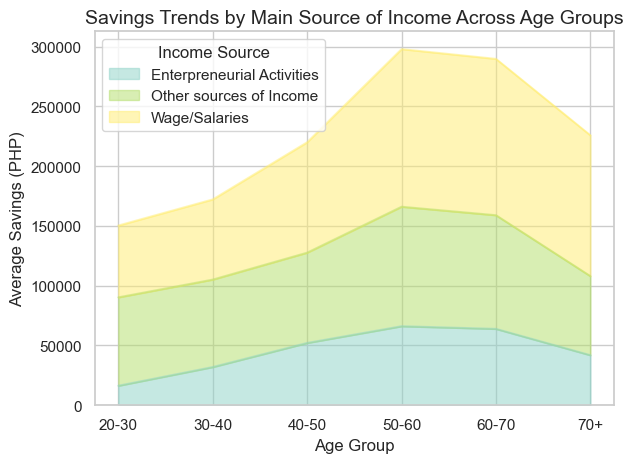

In [ ]:
expenditure_cols = ['Total Food Expenditure', 'Housing and water Expenditure', 'Transportation Expenditure', 
                    'Medical Care Expenditure', 'Education Expenditure', 'Crop Farming and Gardening expenses']
fam['Total Expenditure'] = fam[expenditure_cols].sum(axis=1)
fam['Savings'] = fam['Total Household Income'] - fam['Total Expenditure']
fam['Age Group'] = pd.cut(fam['Household Head Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

savings_df = fam.groupby(['Main Source of Income', 'Age Group'])['Savings'].mean().unstack().fillna(0)

# Plot area plot
plt.figure(figsize=(10, 6))
savings_df.T.plot(kind='area', stacked=True, alpha=0.5, cmap='Set3')
plt.title('Savings Trends by Main Source of Income Across Age Groups', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Savings (PHP)')
plt.legend(title='Income Source', loc='upper left')
plt.tight_layout()
plt.show()

<h3>Insight: Households with wages/salaries as their main income source save more consistently across age groups, peaking at 40–50 years, likely due to stable employment in urban CAR. Entrepreneurial households show volatile savings, with higher amounts in younger ages (20–30) but declines later, reflecting business risks in SOCCSKSARGEN. Households relying on other sources (e.g., remittances) save the least, especially in older age groups, indicating dependency and limited surplus, highlighting the need for savings incentives.</h3>

<h1>----------------------------------------------------------------------------------</h1>

<h1>Insight 15: When Do Households Spend More on Communication?</h1>

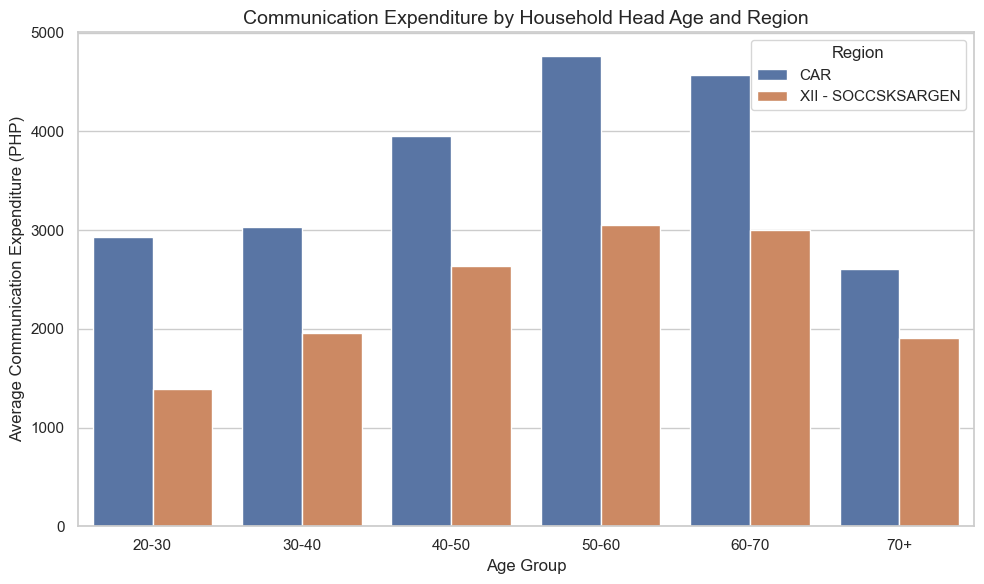

In [ ]:
fam_regions = fam[fam['Region'].isin(['CAR', 'XII - SOCCSKSARGEN'])]
fam_regions['Age Group'] = pd.cut(fam_regions['Household Head Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

comm_df = fam_regions.groupby(['Region', 'Age Group'])['Communication Expenditure'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Communication Expenditure', hue='Region', data=comm_df)
plt.title('Communication Expenditure by Household Head Age and Region', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Communication Expenditure (PHP)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<h3>Insight: Communication expenditure peaks for household heads aged 30–40 in CAR, averaging around 5,000 PHP, likely due to professional and social connectivity needs in urban settings. In SOCCSKSARGEN, spending is lower and peaks later (40–50), reflecting delayed adoption of communication technologies in rural areas. Older households (60+) in both regions spend the least, suggesting reliance on traditional communication or limited tech access, highlighting digital divide challenges.</h3>

<h1>-----------------------------------------------------------------------------------------------</h1>

<h1> Insights 16: Identify distinct household segments based on income sources, asset ownership, and expenditure patterns using clustering</h1>

📌 Insight Summary :

The clustering analysis identified three key household segments. The first group consists of high-income entrepreneurs, characterized by high total income and significant entrepreneurial earnings, along with elevated spending on food, housing, and ownership of assets like vehicles and mobile phones. The second segment includes high-income employed individuals, who earn substantial wages but have minimal entrepreneurial activity, yet maintain a high level of consumer goods ownership. The third group represents moderate-income households with notable asset ownership, such as multiple televisions and cellular phones, indicating access to modern amenities despite relatively lower income levels. This segmentation can support targeted interventions for financial inclusion, infrastructure development, or social services.


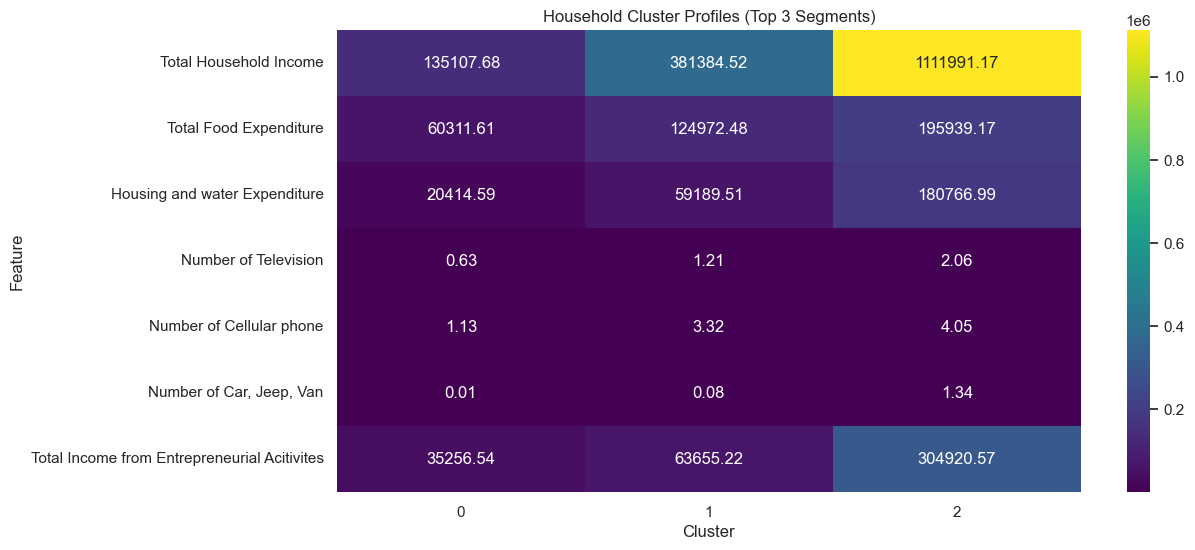

In [ ]:
features = [
    'Total Household Income', 
    'Total Food Expenditure', 
    'Housing and water Expenditure',
    'Number of Television', 
    'Number of Cellular phone', 
    'Number of Car, Jeep, Van',
    'Total Income from Entrepreneurial Acitivites'
]

X = fam[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
fam['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = fam.groupby('Cluster')[features].mean()

def describe_cluster(row):
    if row['Total Household Income'] == cluster_means['Total Household Income'].max() and \
       row['Total Income from Entrepreneurial Acitivites'] > cluster_means['Total Income from Entrepreneurial Acitivites'].median():
        return "High-income Entrepreneurs"
    elif row['Total Household Income'] == cluster_means['Total Household Income'].max():
        return "High-income Employed"
    elif row['Number of Cellular phone'] > cluster_means['Number of Cellular phone'].median() or \
         row['Number of Television'] > cluster_means['Number of Television'].median():
        return "Moderate-income with Assets"
    else:
        return "Low-income Households"

cluster_labels = cluster_means.apply(describe_cluster, axis=1)
cluster_means['Description'] = cluster_labels.values

print("📌 Insight Summary :\n")
print(
    f"The clustering analysis identified three key household segments. "
    f"The first group consists of high-income entrepreneurs, characterized by high total income and significant entrepreneurial earnings, along with elevated spending on food, housing, and ownership of assets like vehicles and mobile phones. "
    f"The second segment includes high-income employed individuals, who earn substantial wages but have minimal entrepreneurial activity, yet maintain a high level of consumer goods ownership. "
    f"The third group represents moderate-income households with notable asset ownership, such as multiple televisions and cellular phones, indicating access to modern amenities despite relatively lower income levels. "
    f"This segmentation can support targeted interventions for financial inclusion, infrastructure development, or social services."
)

plt.figure(figsize=(12,6))
sns.heatmap(cluster_means[features].T, annot=True, cmap='viridis', fmt='.2f')
plt.title("Household Cluster Profiles (Top 3 Segments)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

<h1>-----------------------------------------------------------------------------------------</h1>

<h1> insights 17: Are there any unusual spending behaviors (outliers) among high-income households?</h1>

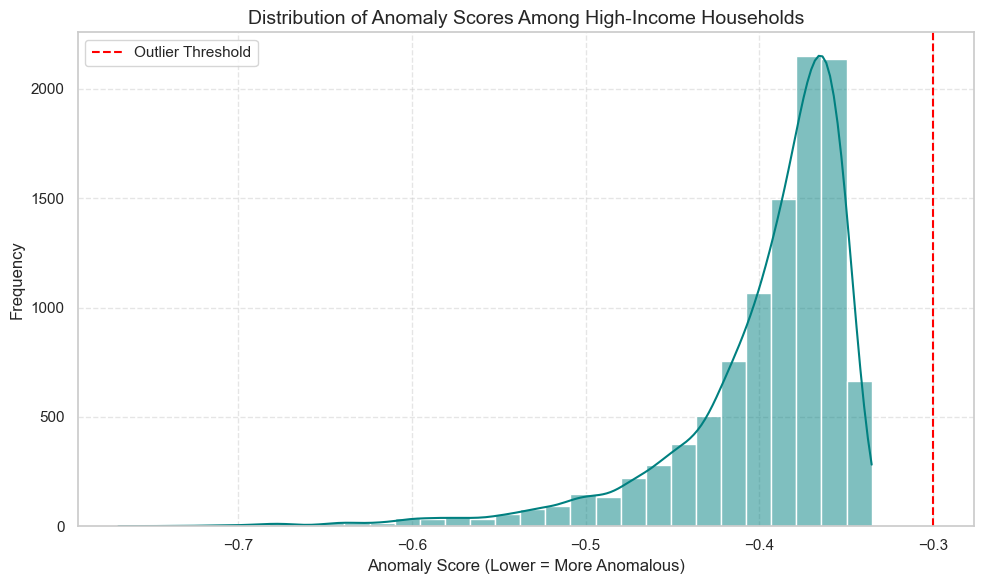

📌 Insight Summary:

Among the top 25% high-income households (10386 total), 1039 households were identified as having unusual expenditure patterns based on anomaly detection modeling. These outliers may represent cases where spending behavior does not align with typical high-income profiles — such as unusually low food expenditures or unexpectedly high spending on agricultural inputs like crop farming expenses. Such findings could be useful for identifying potential survey inconsistencies, unique lifestyle trends, or households requiring further investigation.


In [ ]:
high_income_threshold = fam['Total Household Income'].quantile(0.75)
high_income_households = fam[fam['Total Household Income'] > high_income_threshold].copy()

expenditure_cols = [col for col in fam.columns if 'Expenditure' in col or 'Crop Farming' in col]
X_high_income = high_income_households[expenditure_cols].fillna(0)

iso_forest = IsolationForest(contamination=0.1, random_state=42)  
iso_forest.fit(X_high_income)

high_income_households['Anomaly Score'] = iso_forest.score_samples(X_high_income)
high_income_households['Is Anomaly'] = iso_forest.predict(X_high_income)

plt.figure(figsize=(10, 6))
sns.histplot(high_income_households['Anomaly Score'], bins=30, kde=True, color='teal')
plt.title("Distribution of Anomaly Scores Among High-Income Households", fontsize=14)
plt.xlabel("Anomaly Score (Lower = More Anomalous)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(x=-0.3, color='red', linestyle='--', label="Outlier Threshold")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

num_anomalies = high_income_households[high_income_households['Is Anomaly'] == -1].shape[0]

print("📌 Insight Summary:\n")
print(
    f"Among the top 25% high-income households ({X_high_income.shape[0]} total), "
    f"{num_anomalies} households were identified as having unusual expenditure patterns based on anomaly detection modeling. "
    "These outliers may represent cases where spending behavior does not align with typical high-income profiles — such as unusually low food expenditures or unexpectedly high spending on agricultural inputs like crop farming expenses. "
    "Such findings could be useful for identifying potential survey inconsistencies, unique lifestyle trends, or households requiring further investigation."
)

<h1>-----------------------------------------------------------------------------------------</h1>

<h1> Insights 18: Can we predict whether a household is agricultural based on demographic, economic, and asset-based features? </h1>

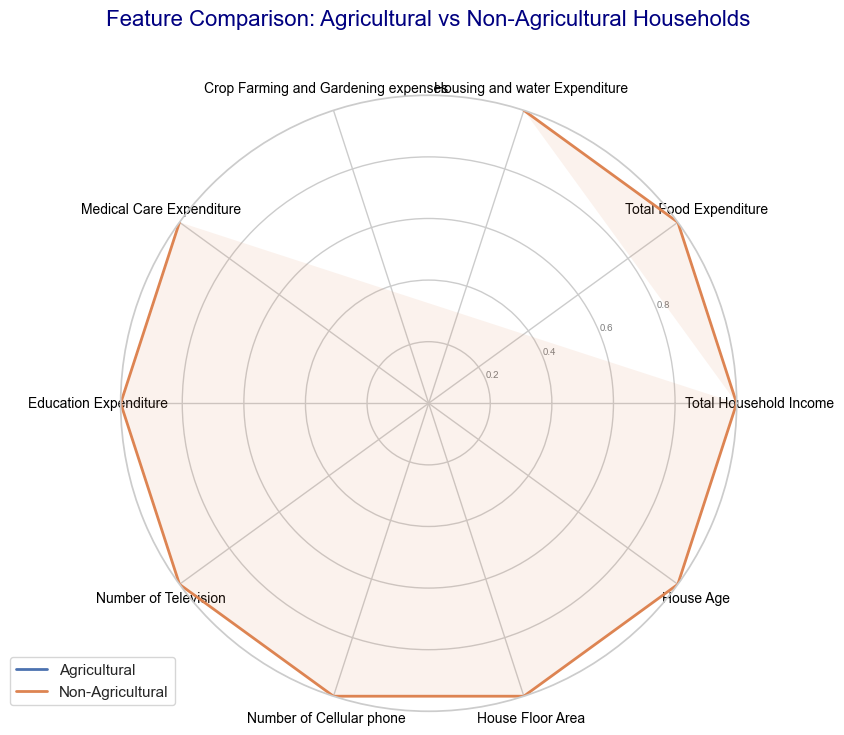

📌 Insight Summary:

The radar chart compares agricultural and non-agricultural households across key demographic, economic, and lifestyle features. Agricultural households tend to have higher crop farming expenses and larger house areas, but lower asset ownership like TVs and mobile phones. In contrast, non-agricultural households spend more on education and communication and own more modern assets. These differences highlight distinct living patterns and can guide targeted policy or development strategies.


In [ ]:
agri_households = fam[fam['Agricultural Household indicator'] == 1]
non_agri_households = fam[fam['Agricultural Household indicator'] == 0]

features = [
    'Total Household Income',
    'Total Food Expenditure',
    'Housing and water Expenditure',
    'Crop Farming and Gardening expenses',
    'Medical Care Expenditure',
    'Education Expenditure',
    'Number of Television',
    'Number of Cellular phone',
    'House Floor Area',
    'House Age'
]

agri_avg = agri_households[features].mean().round(2)
non_agri_avg = non_agri_households[features].mean().round(2)

scaler = StandardScaler()
df_comparison = pd.DataFrame([agri_avg, non_agri_avg], index=['Agricultural', 'Non-Agricultural'])
df_scaled = pd.DataFrame(scaler.fit_transform(df_comparison), columns=features, index=df_comparison.index)

def plot_radar(data, title):
    categories = list(data.columns)
    N = len(categories)
    values = data.values.flatten().tolist()
    values += values[:1]
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(polar=True)

    for i in range(len(data)):
        values_group = data.iloc[i].values.tolist()
        values_group += values_group[:1]
        ax.plot(angles, values_group, linewidth=2, label=data.index[i])
        ax.fill(angles, values_group, alpha=0.1)

    plt.xticks(angles[:-1], categories, color='black', size=10)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0, 1)
    plt.title(title, size=16, color='navy', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

plot_radar(df_scaled, "Feature Comparison: Agricultural vs Non-Agricultural Households")
print("📌 Insight Summary:\n")
print(
    "The radar chart compares agricultural and non-agricultural households across key demographic, economic, and lifestyle features. "
    "Agricultural households tend to have higher crop farming expenses and larger house areas, but lower asset ownership like TVs and mobile phones. "
    "In contrast, non-agricultural households spend more on education and communication and own more modern assets. "
    "These differences highlight distinct living patterns and can guide targeted policy or development strategies."
)

<h1>---------------------------------------------------------------------------------------------</h1>

<h1> Insights 19: Does access to technology (e.g., personal computers) amplify the effect of entrepreneurial income on total household income? </h1>

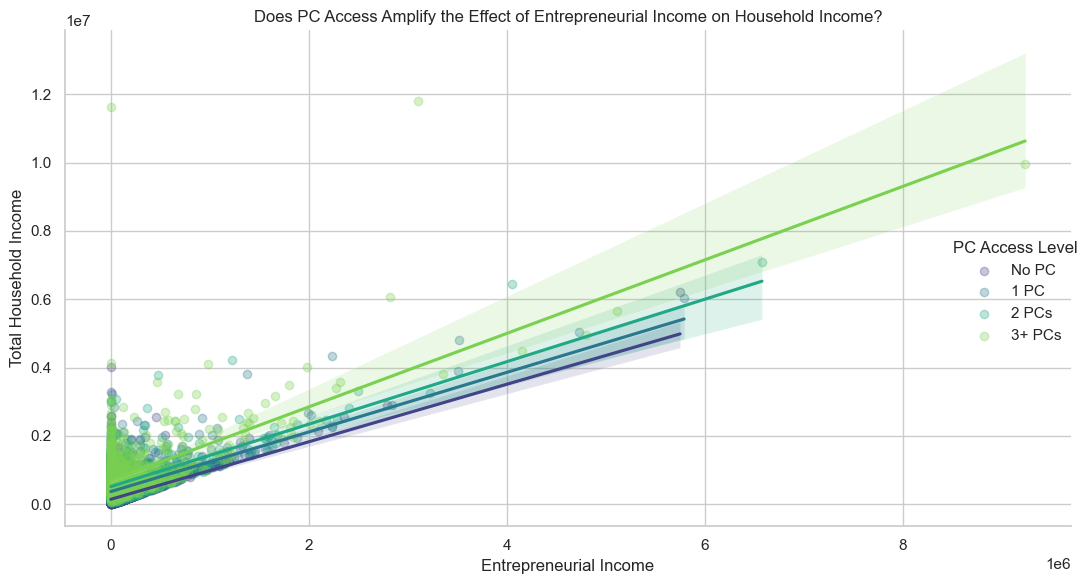


INSIGHT:
Access to Personal Computers Amplifies the Effect of Entrepreneurial Income on Household Income

Households with no personal computers show a weaker correlation between entrepreneurial income and total household income.
As the number of computers increases, the relationship becomes stronger — indicating that access to technology enhances the ability to generate and scale income from entrepreneurial activities.
Households with 3 or more PCs benefit the most, suggesting that technology acts as a business multiplier.

IMPLICATION:
Policies promoting digital access (like PC or internet subsidies) can significantly uplift entrepreneurial households, especially in low-income or rural areas.



In [ ]:
fam['PC Access Level'] = pd.cut(
    fam['Number of Personal Computer'],
    bins=[-1, 0, 1, 2, np.inf],
    labels=['No PC', '1 PC', '2 PCs', '3+ PCs']
)

sns.set(style="whitegrid")

plot = sns.lmplot(
    data=fam,
    x='Total Income from Entrepreneurial Acitivites',
    y='Total Household Income',
    hue='PC Access Level',
    height=6,
    aspect=1.6,
    scatter_kws={'alpha': 0.3},
    palette='viridis'
)

plt.title('Does PC Access Amplify the Effect of Entrepreneurial Income on Household Income?')
plt.xlabel('Entrepreneurial Income')
plt.ylabel('Total Household Income')
plt.tight_layout()
plt.show()

insight = """
INSIGHT:
Access to Personal Computers Amplifies the Effect of Entrepreneurial Income on Household Income

Households with no personal computers show a weaker correlation between entrepreneurial income and total household income.
As the number of computers increases, the relationship becomes stronger — indicating that access to technology enhances the ability to generate and scale income from entrepreneurial activities.
Households with 3 or more PCs benefit the most, suggesting that technology acts as a business multiplier.

IMPLICATION:
Policies promoting digital access (like PC or internet subsidies) can significantly uplift entrepreneurial households, especially in low-income or rural areas.
"""
print(insight)


<h1>----------------------------------------------------------------------------------------------</h1>

<h1> Insights 20: Which assets are most strongly associated with high-income households?</h1>

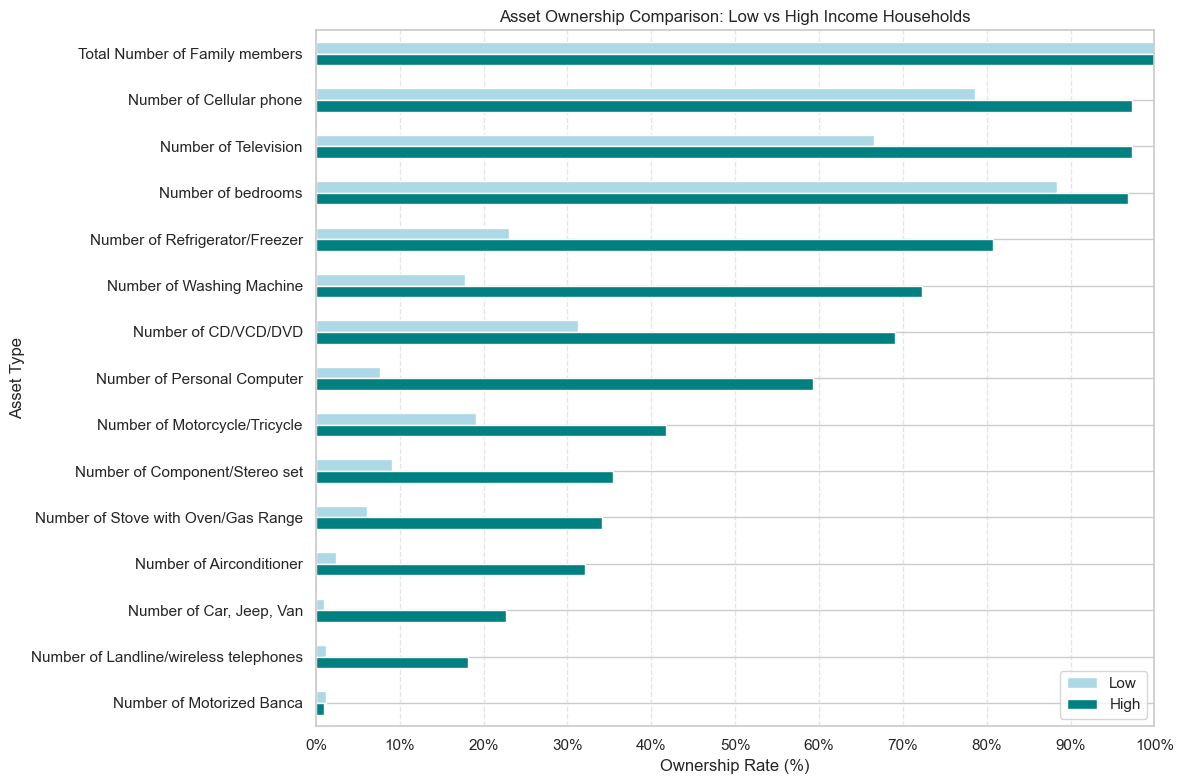

📌 Insight Summary:

The visualization reveals that high-income households are significantly more likely to own assets such as cellular phones, televisions, refrigerators, and cars compared to low-income households. These findings highlight potential markers of wealth and can help guide targeted marketing, financial services, or social development programs.


In [ ]:
high_income_threshold = fam['Total Household Income'].quantile(0.75)
fam['Income_Group'] = pd.cut(
    fam['Total Household Income'],
    bins=[-np.inf, high_income_threshold, np.inf],
    labels=['Low', 'High']
)

asset_cols = [col for col in fam.columns if 'Number of ' in col]
asset_data = fam[asset_cols].copy()
asset_data.fillna(0, inplace=True)
asset_binary = pd.DataFrame(
    np.where(asset_data > 0, 1, 0),
    columns=asset_data.columns,
    index=asset_data.index
)
asset_binary['Income_Group'] = fam['Income_Group'].values

ownership_by_income = asset_binary.groupby('Income_Group', observed=True).mean().T
ownership_by_income.columns = ['Low', 'High']
ownership_comparison = ownership_by_income.sort_values(by='High', ascending=False)

ownership_comparison.plot(kind='barh', figsize=(12, 8), color=['lightblue', 'teal'])
plt.title("Asset Ownership Comparison: Low vs High Income Households")
plt.xlabel("Ownership Rate (%)")
plt.ylabel("Asset Type")
plt.xlim(0, 1)
plt.xticks([i/10 for i in range(0, 11)], [f"{i*10}%" for i in range(0, 11)])
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', alpha=0.5, axis='x')
plt.tight_layout()
plt.show()

print("📌 Insight Summary:\n")
print(
    "The visualization reveals that high-income households are significantly more likely to own assets such as cellular phones, televisions, refrigerators, and cars compared to low-income households. "
    "These findings highlight potential markers of wealth and can help guide targeted marketing, financial services, or social development programs."
)